<a href="https://colab.research.google.com/github/anu04596/DeepLearningTuotorial/blob/main/Day6(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Load Dataset

In [2]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

trainset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
testset=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)

trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 21.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 611kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.55MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.20MB/s]


CNN Model

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1=nn.Conv2d(1,16,kernel_size=3,padding=1)
        self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(16,32,kernel_size=3,padding=1)
        self.fc1=nn.Linear(32*7*7,256)
        self.fc2=nn.Linear(256,10)

    def forward(self,x):
        x=self.pool(torch.relu(self.conv1(x)))
        x=self.pool(torch.relu(self.conv2(x)))
        x=x.view(-1,32*7*7)
        x=torch.relu(self.fc1(x))
        x=self.fc2(x)
        return x

In [4]:
model=CNN()
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

Train CNN

In [5]:
epochs=5
for epoch in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    optimizer.zero_grad()
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
  print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader)}")


Epoch 1/5, Loss: 0.15968355321849603
Epoch 2/5, Loss: 0.045584404292250316
Epoch 3/5, Loss: 0.0333989881972749
Epoch 4/5, Loss: 0.022800342740665346
Epoch 5/5, Loss: 0.018089786792339795


Test Accuracy

In [6]:
correct=0
total=0
with torch.no_grad():
  for images,labels, in testloader:
    outputs=model(images)
    _,predicted=torch.max(outputs,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
print(f"Accuracy: {100*correct/total}%")

Accuracy: 98.9%


Visualize Predictions

In [7]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

dataiter = iter(testloader)
images, labels = next(dataiter)

with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

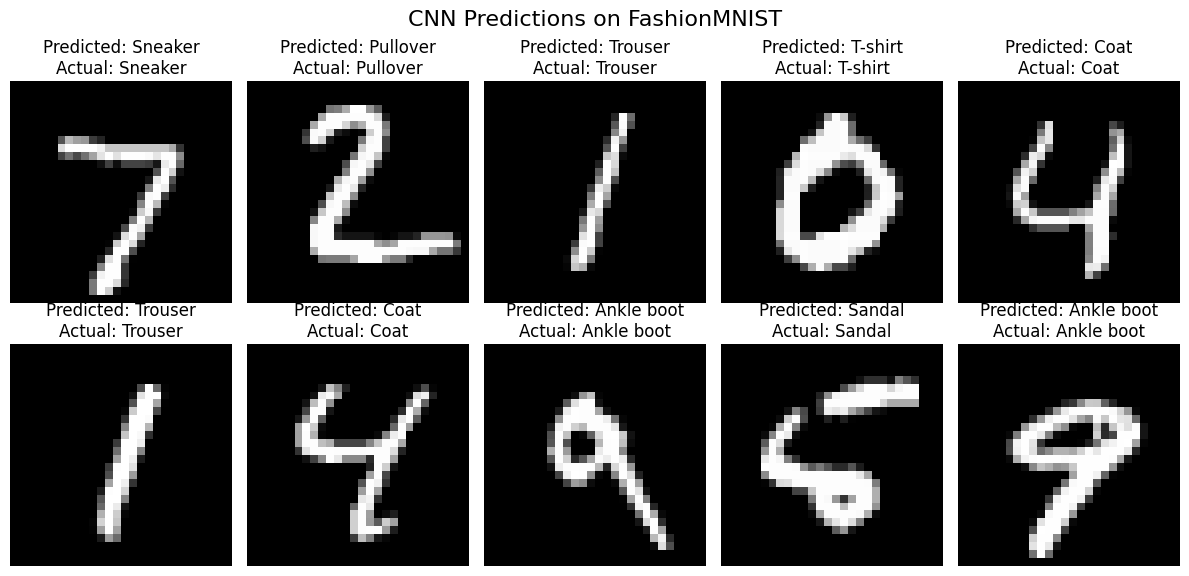

In [8]:
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(images[i].squeeze(),cmap='gray')
  plt.title(f"Predicted: {classes[predicted[i]]}\nActual: {classes[labels[i]]}")
  plt.axis('off')
plt.suptitle("CNN Predictions on FashionMNIST", fontsize=16)
plt.tight_layout()
plt.show()